
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [4]:
import pandas as pd
df = pd.read_excel('data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [5]:
df.columns

Index(['Номер заказа', 'Канал продаж', 'Продуктовый сегмент', 'Менеджер',
       'Название заказа', 'Продавец', 'Город', 'Продажи факт, тыс.руб',
       'Продажи план, тыс.руб', 'Дата сделки', 'Дата оплаты',
       'Дней между сделкой и оплатой', 'Статус'],
      dtype='object')

Приводим названия столбцов к нижнему регистру

In [6]:
update = []
for i in df.columns:
    update.append(i.lower())
df.columns = update

In [7]:
df.columns

Index(['номер заказа', 'канал продаж', 'продуктовый сегмент', 'менеджер',
       'название заказа', 'продавец', 'город', 'продажи факт, тыс.руб',
       'продажи план, тыс.руб', 'дата сделки', 'дата оплаты',
       'дней между сделкой и оплатой', 'статус'],
      dtype='object')

Убираем пропуски

In [8]:
df.isna().sum()

номер заказа                     0
канал продаж                     0
продуктовый сегмент              0
менеджер                         0
название заказа                  0
продавец                         0
город                            0
продажи факт, тыс.руб            0
продажи план, тыс.руб            0
дата сделки                      0
дата оплаты                     23
дней между сделкой и оплатой     0
статус                           0
dtype: int64

In [9]:
df['дата оплаты'] = df['дата оплаты'].fillna


In [10]:
df.isna().sum()

номер заказа                    0
канал продаж                    0
продуктовый сегмент             0
менеджер                        0
название заказа                 0
продавец                        0
город                           0
продажи факт, тыс.руб           0
продажи план, тыс.руб           0
дата сделки                     0
дата оплаты                     0
дней между сделкой и оплатой    0
статус                          0
dtype: int64

Преобразование данных в нужные типы

In [11]:
df['дней между сделкой и оплатой'] = pd.to_numeric(df['дней между сделкой и оплатой'], errors = 'coerce')
df['дата оплаты'] = pd.to_datetime(df['дата оплаты'], errors = 'coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   номер заказа                  116 non-null    int64         
 1   канал продаж                  116 non-null    object        
 2   продуктовый сегмент           116 non-null    object        
 3   менеджер                      116 non-null    object        
 4   название заказа               116 non-null    object        
 5   продавец                      116 non-null    object        
 6   город                         116 non-null    object        
 7   продажи факт, тыс.руб         116 non-null    int64         
 8   продажи план, тыс.руб         116 non-null    int64         
 9   дата сделки                   116 non-null    datetime64[ns]
 10  дата оплаты                   0 non-null      datetime64[ns]
 11  дней между сделкой и оплатой  93

суммарные фактические продажи по всем городам

In [13]:
df['суммарные фактические продажи'] = df.groupby('город')['продажи факт, тыс.руб'].transform('sum')

In [14]:
df.head()

,номер заказа,канал продаж,продуктовый сегмент,менеджер,название заказа,продавец,город,"продажи факт, тыс.руб","продажи план, тыс.руб",дата сделки,дата оплаты,дней между сделкой и оплатой,статус,суммарные фактические продажи
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,NaT,52.0,Закрыто,1370
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,NaT,15.0,Закрыто,1370
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,NaN,В процессе,1370
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,NaT,1.0,Закрыто,1370
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,NaT,87.0,Закрыто,7680


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле. 

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Выполнение плана продаж менеджерами

In [27]:
df['выполнение плана'] = df['продажи факт, тыс.руб'] / df['продажи план, тыс.руб']
manager_performance = df.groupby('менеджер')['выполнение плана'].mean().sort_values(ascending=False)
manager_performance.head()

менеджер
А. Фостер    1.158333
М. Баили     1.006837
Р. Хайерс    0.798132
А. Перри     0.650000
С. Милер     0.452000
Name: выполнение плана, dtype: float64

Помесячная динамика выполнения плана

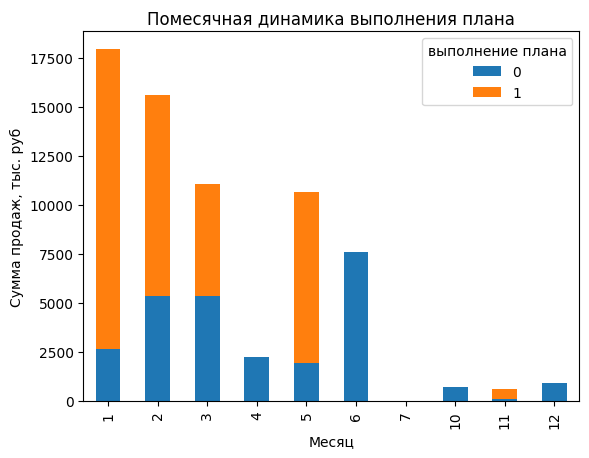

In [15]:
import matplotlib.pyplot as plt
df['выполнение плана'] = df['продажи факт, тыс.руб'] >= df['продажи план, тыс.руб']
df['выполнение плана'] = df['выполнение плана'].astype(int)
sales_month = df.groupby([df['дата сделки'].dt.month, 'выполнение плана'])['продажи факт, тыс.руб'].sum()
sales_month.unstack().plot(kind = 'bar', stacked = True)
plt.title('Помесячная динамика выполнения плана')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж, тыс. руб')
plt.show()

Продажи по продуктовым сегментам

In [16]:
sales = df.groupby('продуктовый сегмент')['продажи факт, тыс.руб'].sum()
sales.sort_values(ascending=False)

продуктовый сегмент
Оборудование              35099
Другое                     7225
Свет                       6950
Ткань и аксессуары         5712
Одежда                     4650
Электронные устройства     2130
Бассейн                    1500
Сувениры                    970
Спорт товары                750
Автозапчасти                700
Упаковка                    675
Медецина                    400
Игрушки                     250
Косметика                   200
Охота и рыбалка               0
Name: продажи факт, тыс.руб, dtype: int64

Сегменты с наибольшими суммарными продажами и распределение по месяцам

In [17]:
top = sales.nlargest(5)
top_sales = df[df['продуктовый сегмент'].isin(top.index)]
month_sales_top = top_sales.groupby([top_sales['дата оплаты'].dt.month, 'продуктовый сегмент'])['продажи факт, тыс.руб'].sum()
month_sales_top_sorted = month_sales_top.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))
month_sales_top_sorted

Series([], Name: продажи факт, тыс.руб, dtype: int64)

География продаж

In [18]:
city = df.groupby('город')['продажи факт, тыс.руб'].sum().sort_values(ascending=False)
city

город
Челябинск          8700
Казань             8040
Магнитогорск       7680
Сочи               6950
Новосибирск        5725
Самара             5574
Уфа                4350
Волгоград          4250
Москва             3717
Оренбург           2750
Тула               1850
Нижний Новгород    1635
Кемерово           1500
Санкт-Петербург    1370
Улан-Удэ            970
Пермь               770
Курск               700
Саратов             430
Омск                250
Севастополь           0
Стоврополь            0
Липецк                0
Ярославль             0
Name: продажи факт, тыс.руб, dtype: int64

Влияние канала продаж на выполнение плана

In [19]:
plan = df.groupby('канал продаж')['выполнение плана'].mean().sort_values(ascending=False)
plan

канал продаж
Холодный звонок        0.363636
Рекомендация           0.343750
Выставка               0.277778
Почта                  0.250000
Вебсайт                0.000000
Контекстная реклама    0.000000
Name: выполнение плана, dtype: float64

Конверсия

In [20]:
conversion = df.groupby('канал продаж').apply(lambda x: x['продажи факт, тыс.руб'].sum() / x['продажи план, тыс.руб'].sum()).sort_values(ascending=False)
conversion

C:\Users\teryx\AppData\Local\Temp\ipykernel_10816\428094700.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion = df.groupby('канал продаж').apply(lambda x: x['продажи факт, тыс.руб'].sum() / x['продажи план, тыс.руб'].sum()).sort_values(ascending=False)


канал продаж
Рекомендация           1.060882
Выставка               0.806873
Холодный звонок        0.806769
Почта                  0.442857
Вебсайт                0.400000
Контекстная реклама    0.350000
dtype: float64

Длительность сделки

In [21]:
duration = df.groupby('канал продаж')['дней между сделкой и оплатой'].mean().sort_values(ascending=False)
duration

канал продаж
Почта                  57.000000
Холодный звонок        44.033333
Контекстная реклама    29.800000
Рекомендация           26.440000
Вебсайт                20.000000
Выставка                9.214286
Name: дней между сделкой и оплатой, dtype: float64

Товарные категории которые пользуются спросом по числу клиентов

In [28]:
category_demand = df.groupby('продуктовый сегмент')['продавец'].nunique().sort_values(ascending=False)
category_demand.head()

продуктовый сегмент
Оборудование              7
Ткань и аксессуары        6
Другое                    4
Одежда                    4
Электронные устройства    4
Name: продавец, dtype: int64

Товарные категории которые пользуются спросом по числу продаж

In [29]:
category_sales = df.groupby('продуктовый сегмент')['номер заказа'].count().sort_values(ascending=False)
category_sales.head()

продуктовый сегмент
Оборудование              46
Ткань и аксессуары        21
Свет                      12
Другое                    10
Электронные устройства     7
Name: номер заказа, dtype: int64

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

Менеджеры показывают разные результаты по выполнению плана продаж в зависимости от товарных категорий и каналов продаж. Например, один менеджер может успешно закрывать сделки в сегменте "Электронные устройства", но иметь низкие результаты в сегменте "Ткань и аксессуары".
Рекомендуется профилировать менеджеров по сильным сторонам. Это позволит направлять их усилия на более перспективные категории и каналы, где их эффективность выше. Также можно обучить менеджеров, показывающих слабые результаты в определённых сегментах.